In [1]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df2 = pd.read_csv('processed_data.csv')
print(df2.head())

   Age            Course  Gender  CGPA  Stress_Level  Depression_Score  \
0   25            Others    Male  3.56             3                 3   
1   19          Business  Female  3.74             4                 0   
2   19  Computer Science    Male  3.65             2                 1   
3   18          Business    Male  3.40             3                 3   
4   21           Medical  Female  3.35             2                 4   

   Anxiety_Score Sleep_Quality Physical_Activity Diet_Quality Social_Support  \
0              2          Good          Moderate         Good       Moderate   
1              3          Good               Low      Average       Moderate   
2              0       Average               Low      Average       Moderate   
3              4          Good               Low      Average           High   
4              3          Good          Moderate         Good           High   

  Relationship_Status Substance_Use Counseling_Service_Use Family_History 

In [5]:
# Thống kê mô tả
# In thống kê mô tả các cột đã chuẩn hóa
print(df2.describe())


              Age         CGPA  Stress_Level  Depression_Score  Anxiety_Score  \
count  6983.00000  6983.000000   6983.000000       6983.000000    6983.000000   
mean     22.94816     3.492594      2.426178          2.256194       2.303451   
std       3.77787     0.285520      1.638467          1.625785       1.624345   
min      18.00000     2.630000      0.000000          0.000000       0.000000   
25%      20.00000     3.290000      1.000000          1.000000       1.000000   
50%      22.00000     3.500000      2.000000          2.000000       2.000000   
75%      25.00000     3.700000      4.000000          3.000000       4.000000   
max      34.00000     4.000000      5.000000          5.000000       5.000000   

       Financial_Stress  Semester_Credit_Load  
count       6983.000000           6983.000000  
mean           2.449950             22.009881  
std            1.709338              4.356143  
min            0.000000             15.000000  
25%            1.000000       

In [7]:
## I. Nhóm nhân khẩu học và học thuật

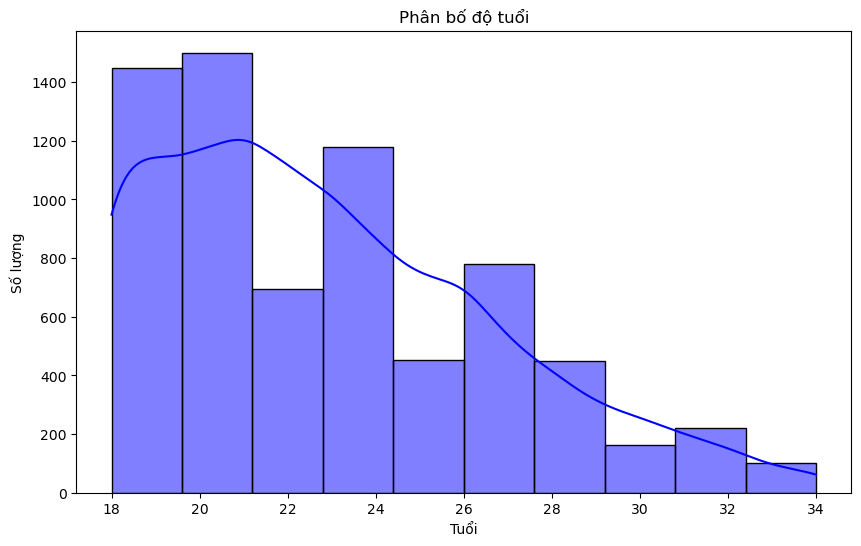

In [9]:
# 1.Phân bố độ tuổi
# Tạo biểu đồ
plt.figure(figsize=(10, 6))  # Đặt kích thước biểu đồ

# Vẽ biểu đồ cột
sns.histplot(df2['Age'], bins=10, kde=True, color='blue')  # Biểu đồ phân bố độ tuổi

# Thêm tiêu đề và nhãn trục
plt.title('Phân bố độ tuổi')  # Tiêu đề biểu đồ
plt.xlabel('Tuổi')            # Nhãn trục X
plt.ylabel('Số lượng')         # Nhãn trục Y

# Hiển thị biểu đồ
plt.show()

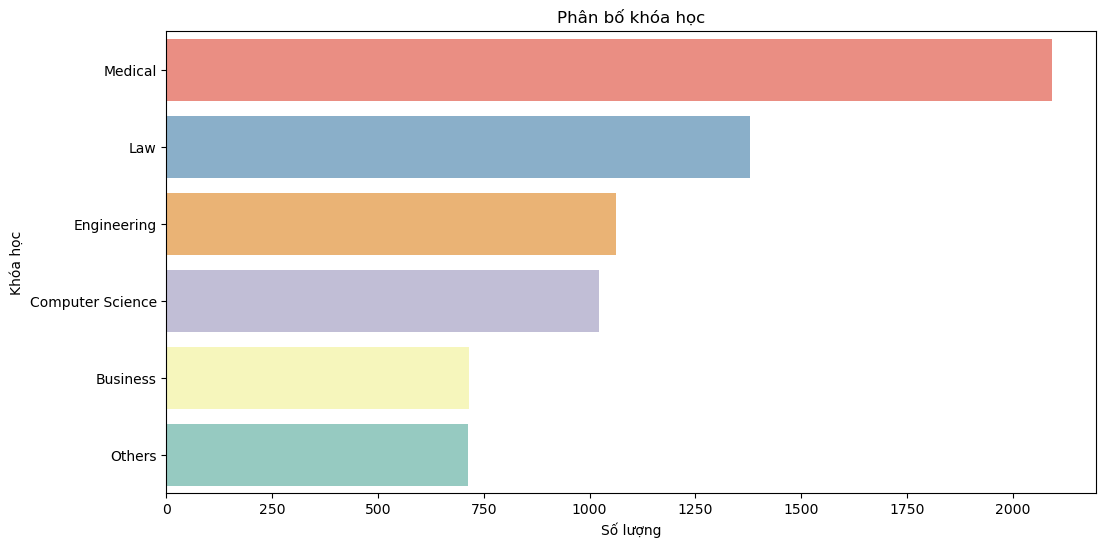

In [11]:
# 2. Phân bố khóa học
# Vẽ biểu đồ phân bố khóa học
plt.figure(figsize=(12, 6))  # Đặt kích thước biểu đồ

# Sử dụng seaborn để vẽ biểu đồ đếm (countplot)
sns.countplot(
    y='Course',  # Vẽ khóa học trên trục Y
    data=df2,  # Dữ liệu từ DataFrame df2
    palette='Set3',  # Sử dụng bảng màu Set3 để làm biểu đồ đẹp hơn
    order=df2['Course'].value_counts().index,  # Sắp xếp khóa học theo số lượng
    hue='Course',  # Dùng chính biến 'Course' làm phân nhóm màu
    dodge=False  # Tắt sự dịch chuyển các nhóm
)

# Tắt hiển thị chú giải
plt.legend([], [], frameon=False)

# Thêm tiêu đề và nhãn cho biểu đồ
plt.title('Phân bố khóa học')  # Tiêu đề biểu đồ
plt.xlabel('Số lượng')  # Nhãn trục X
plt.ylabel('Khóa học')  # Nhãn trục Y

# Hiển thị biểu đồ
plt.show()


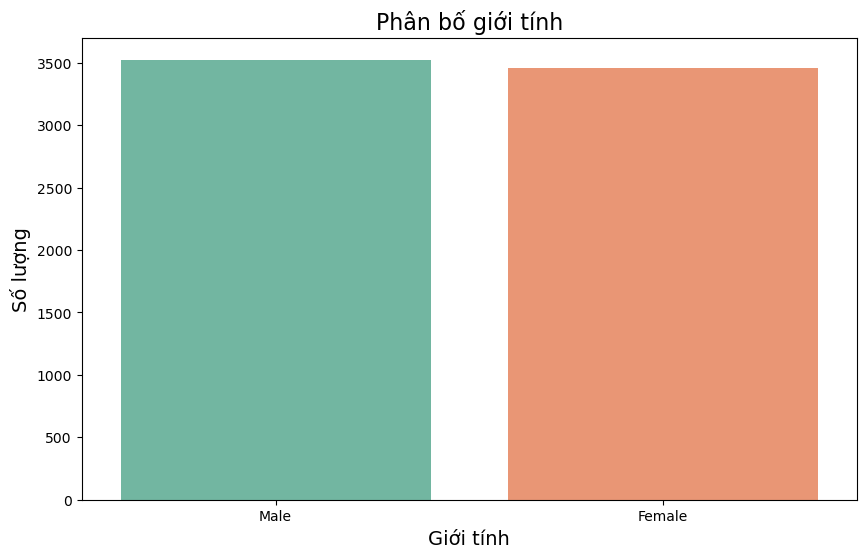

In [13]:
# 3. Phân bổ giới tính
# Tạo biểu đồ phân bố giới tính
plt.figure(figsize=(10, 6))  # Đặt kích thước biểu đồ

# Vẽ biểu đồ đếm số lượng theo giới tính
sns.countplot(
    x='Gender',          # Vẽ giới tính trên trục X
    data=df2,            # Dữ liệu sử dụng từ DataFrame df2
    palette='Set2',      # Sử dụng bảng màu Set2
    hue='Gender',        # Dùng chính biến "Gender" để phân nhóm màu
    dodge=False          # Không dịch chuyển các thanh (thanh đơn giản)
)

# Tắt chú giải
plt.legend([], [], frameon=False)

# Thêm tiêu đề và nhãn cho các trục
plt.title('Phân bố giới tính', fontsize=16)  # Tiêu đề biểu đồ
plt.xlabel('Giới tính', fontsize=14)        # Nhãn trục X
plt.ylabel('Số lượng', fontsize=14)         # Nhãn trục Y

# Hiển thị biểu đồ
plt.show()

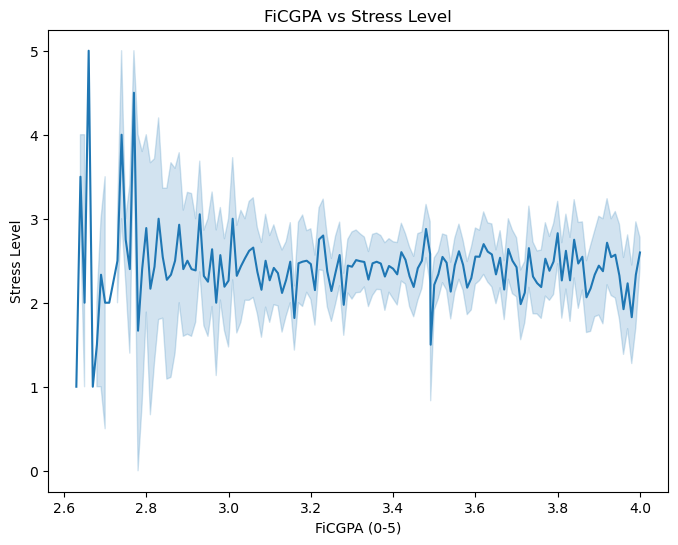

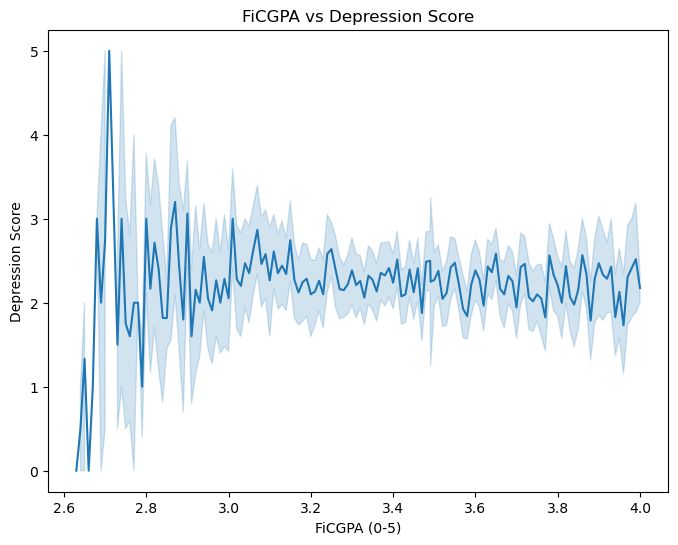

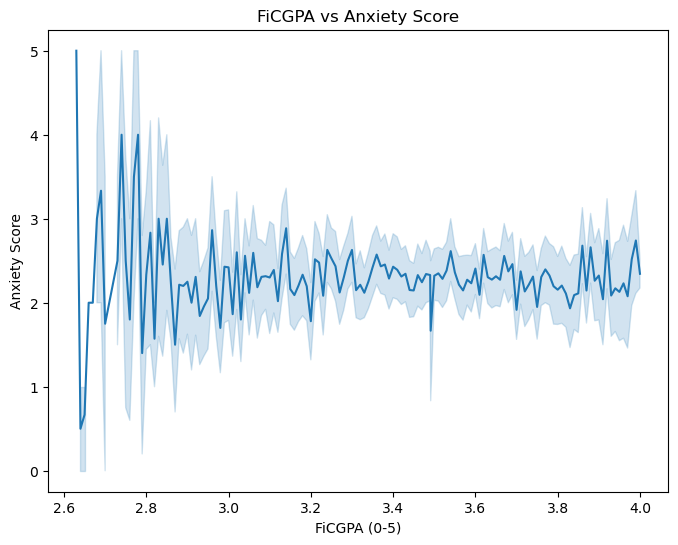

In [15]:
# 4. Biểu đồ đường cho FiCGPA và Stress Level
plt.figure(figsize=(8, 6))
sns.lineplot(x='CGPA', y='Stress_Level', data=df2)
plt.title('FiCGPA vs Stress Level')
plt.xlabel('FiCGPA (0-5)')
plt.ylabel('Stress Level')
plt.show()

# Biểu đồ đường cho FiCGPA và Depression Score
plt.figure(figsize=(8, 6))
sns.lineplot(x='CGPA', y='Depression_Score', data=df2)
plt.title('FiCGPA vs Depression Score')
plt.xlabel('FiCGPA (0-5)')
plt.ylabel('Depression Score')
plt.show()

# Biểu đồ đường cho FiCGPA và Anxiety Score
plt.figure(figsize=(8, 6))
sns.lineplot(x='CGPA', y='Anxiety_Score', data=df2)
plt.title('FiCGPA vs Anxiety Score')
plt.xlabel('FiCGPA (0-5)')
plt.ylabel('Anxiety Score')
plt.show()


In [31]:
# 5. Nhóm theo Độ tuổi và Điểm Sức khỏe Tâm thần Trung bình
mental_health_factors = ['Stress_Level', 'Depression_Score', 'Anxiety_Score']
age_group_analysis = df2.groupby('Age')[mental_health_factors].mean()
print("\nAverage Mental Health Scores by Age:")
print(age_group_analysis)



Average Mental Health Scores by Age:
     Stress_Level  Depression_Score  Anxiety_Score
Age                                               
18       2.544715          2.261518       2.303523
19       2.533145          2.218618       2.258110
20       2.356846          2.290456       2.334716
21       2.450450          2.209781       2.270270
22       2.441558          2.243867       2.236652
23       2.429688          2.365625       2.312500
24       2.293680          2.250929       2.226766
25       2.438326          2.160793       2.387665
26       2.295405          2.207877       2.315098
27       2.504644          2.365325       2.464396
28       2.326923          2.323077       2.365385
29       2.444444          2.111111       2.465608
30       2.465839          2.211180       2.161491
31       2.201613          2.346774       2.306452
32       2.319588          2.463918       2.175258
33       2.345455          2.127273       2.218182
34       2.733333          2.222222       2.

<Figure size 1200x600 with 0 Axes>

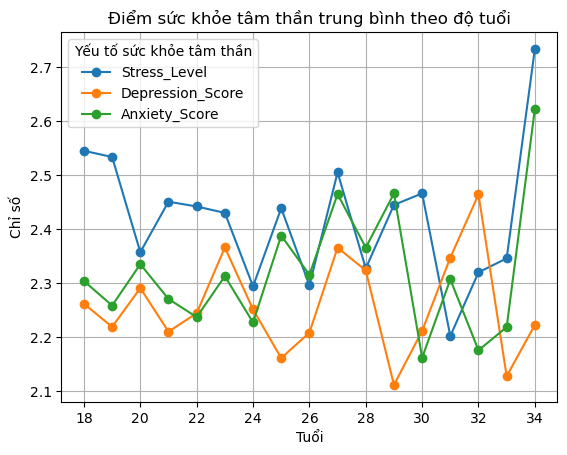

In [33]:
# Biểu đồ Điểm sức khỏe tâm thần trung bình theo độ tuổi
plt.figure(figsize=(12, 6))
age_group_analysis.plot(kind='line', marker='o')
plt.title('Điểm sức khỏe tâm thần trung bình theo độ tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Chỉ số')
plt.legend(title='Yếu tố sức khỏe tâm thần')
plt.grid()
plt.show()

In [35]:
# 8. Nhóm theo Giới tính và Khóa học và Điểm Sức khỏe Tâm thần Trung bình
mental_health_factors = ['Stress_Level', 'Depression_Score', 'Anxiety_Score']
gender_course_analysis = df2.groupby(['Gender', 'Course'])[mental_health_factors].mean()
print("\nĐiểm sức khỏe tâm thần trung bình theo giới tính và khóa học:")
print(gender_course_analysis)


Điểm sức khỏe tâm thần trung bình theo giới tính và khóa học:
                         Stress_Level  Depression_Score  Anxiety_Score
Gender Course                                                         
Female Business              2.057377          2.030055       1.959016
       Computer Science      2.145129          3.339960       2.065606
       Engineering           2.052536          2.090580       1.998188
       Law                   2.111756          2.123367       3.238026
       Medical               3.243806          2.052527       2.126858
       Others                2.064897          2.067847       2.185841
Male   Business              2.146552          2.192529       2.123563
       Computer Science      1.950000          3.263462       2.032692
       Engineering           2.152642          2.086106       2.150685
       Law                   2.134978          2.076923       3.242380
       Medical               3.181734          2.036900       2.038745
       Others 

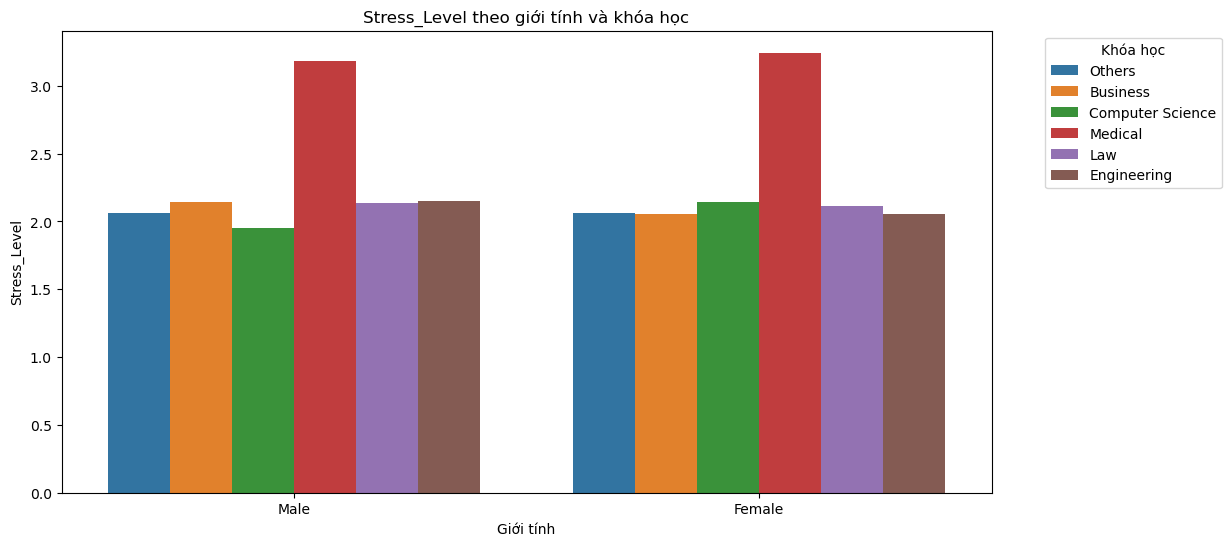

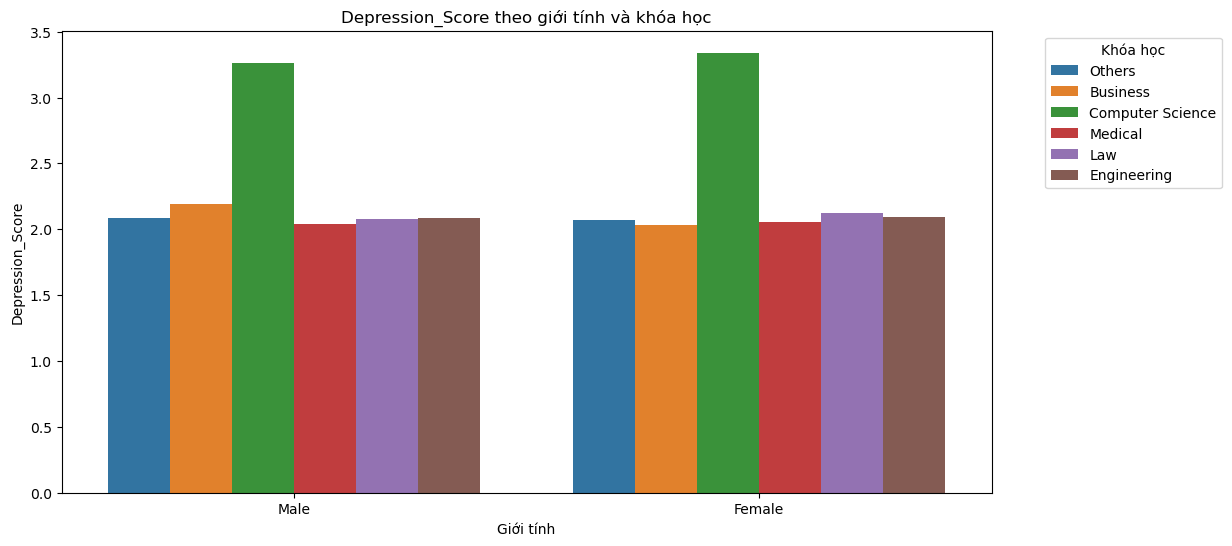

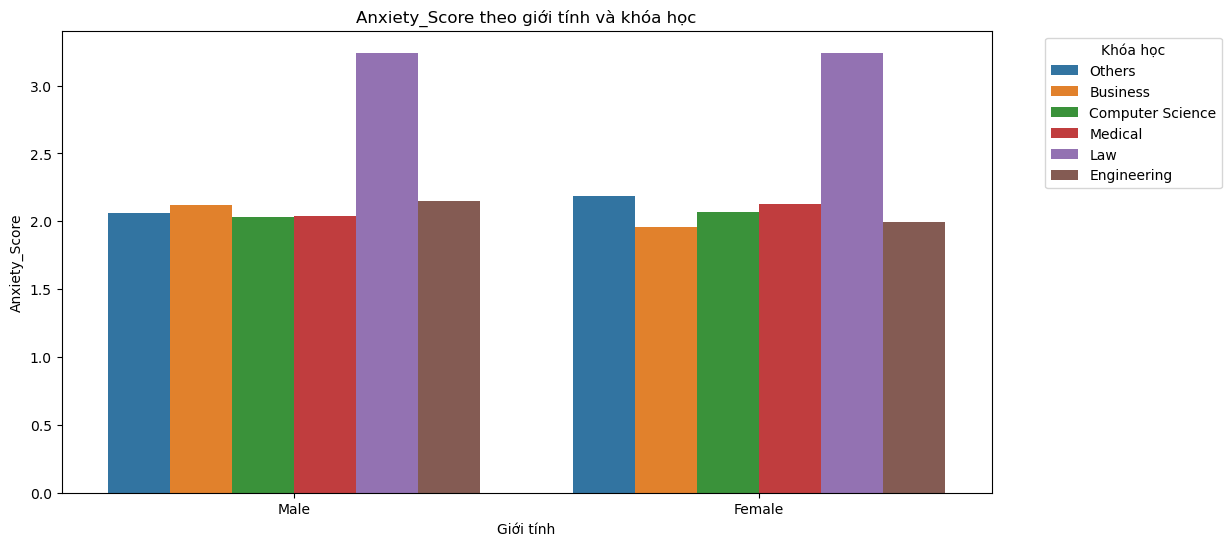

In [37]:
# Biểu đồ Điểm sức khỏe tâm thần trung bình theo giới tính và khóa học

for factor in mental_health_factors:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Gender', y=factor, hue='Course', data=df2, errorbar=None)
    plt.title(f'{factor} theo giới tính và khóa học')
    plt.xlabel('Giới tính')
    plt.ylabel(factor)
    plt.legend(title='Khóa học', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [86]:
## II. Nhóm hành vi lối sống 

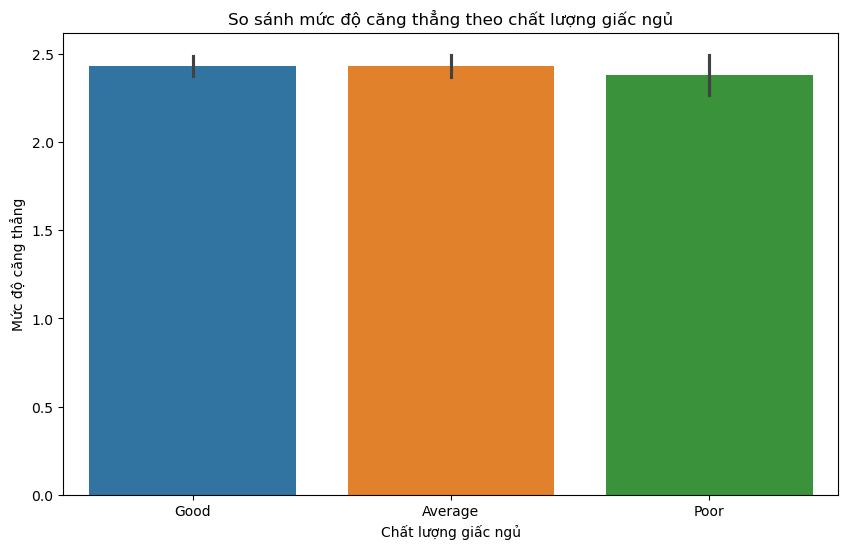

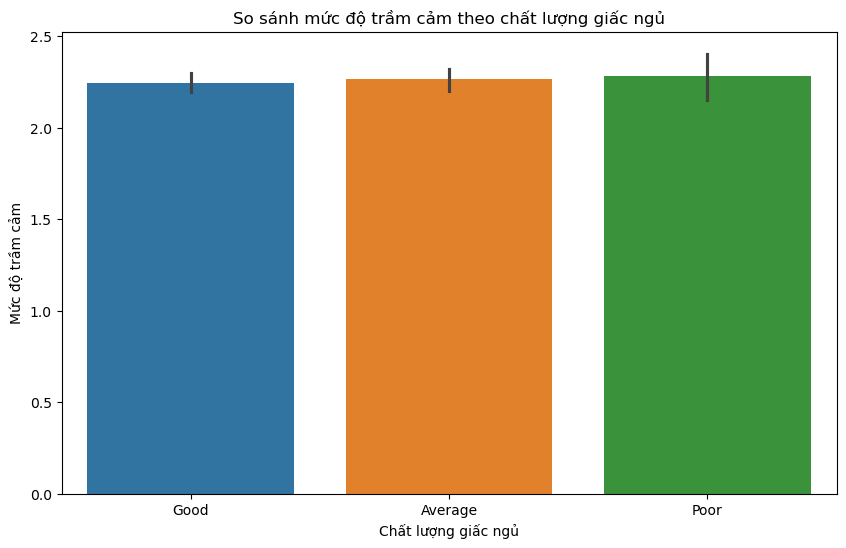

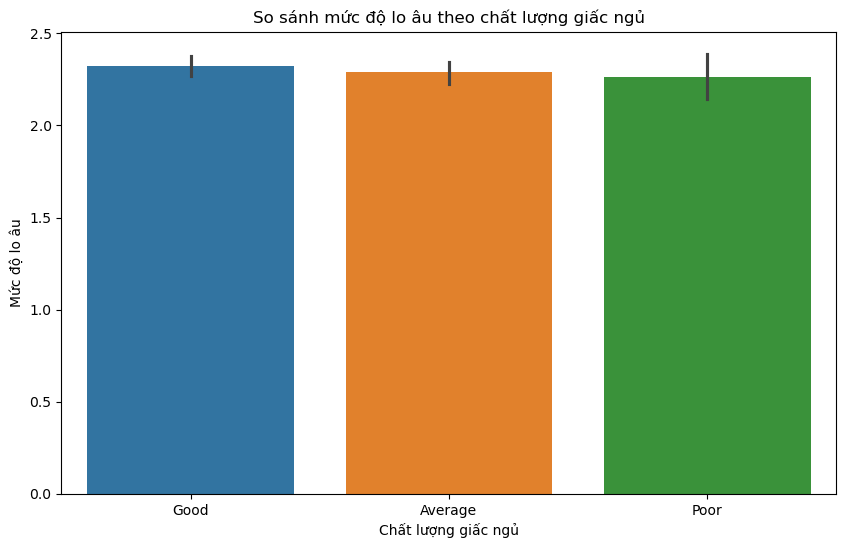

In [47]:
# biểu đồ cho mỗi yếu tố (chất lượng giấc ngủ)
plt.figure(figsize=(10, 6))
sns.barplot(x='Sleep_Quality', y='Stress_Level', data=df2, hue='Sleep_Quality')
plt.title('So sánh mức độ căng thẳng theo chất lượng giấc ngủ')
plt.xlabel('Chất lượng giấc ngủ')
plt.ylabel('Mức độ căng thẳng')
plt.show()

# Biểu đồ cho Depression
plt.figure(figsize=(10, 6))
sns.barplot(x='Sleep_Quality', y='Depression_Score', data=df2, hue='Sleep_Quality')
plt.title('So sánh mức độ trầm cảm theo chất lượng giấc ngủ')
plt.xlabel('Chất lượng giấc ngủ')
plt.ylabel('Mức độ trầm cảm')
plt.show()

# Biểu đồ cho Anxiety
plt.figure(figsize=(10, 6))
sns.barplot(x='Sleep_Quality', y='Anxiety_Score', data=df2, hue='Sleep_Quality')
plt.title('So sánh mức độ lo âu theo chất lượng giấc ngủ')
plt.xlabel('Chất lượng giấc ngủ')
plt.ylabel('Mức độ lo âu')
plt.show()


In [55]:
# Nhóm chất lượng giác ngủ và điểm sức khỏe tâm thần trung bình
Sleep_Quality_analysis = df2.groupby('Sleep_Quality')[mental_health_factors].mean()
print("\nĐiểm sức khỏe tâm thần trung bình theo chất lượng giấc ngủ:")
print(Sleep_Quality_analysis)


Điểm sức khỏe tâm thần trung bình theo chất lượng giấc ngủ:
               Stress_Level  Depression_Score  Anxiety_Score
Sleep_Quality                                               
Average            2.430198          2.264144       2.288024
Good               2.431334          2.245235       2.322870
Poor               2.383838          2.281385       2.264069


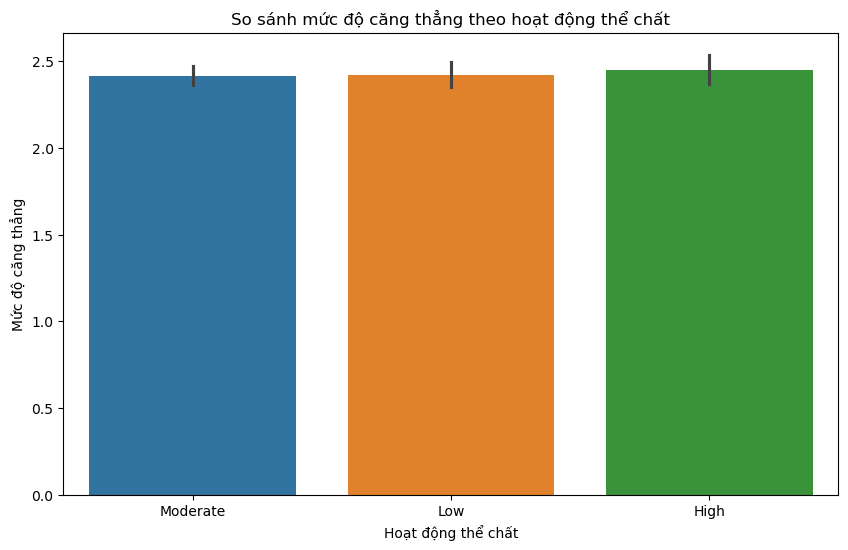

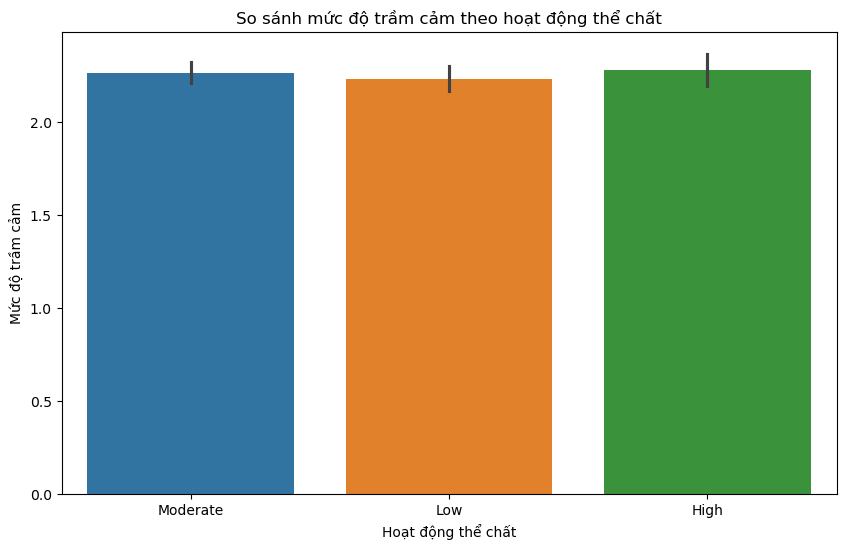

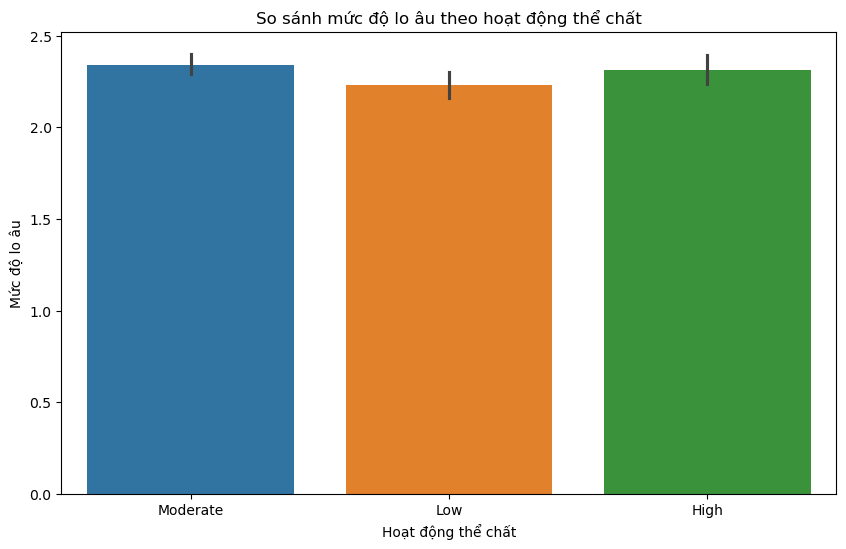

In [49]:
# biểu đồ cho mỗi yếu tố ( hoạt động thể chất )

plt.figure(figsize=(10, 6))
sns.barplot(x='Physical_Activity', y='Stress_Level', data=df2, hue='Physical_Activity')
plt.title('So sánh mức độ căng thẳng theo hoạt động thể chất')
plt.xlabel('Hoạt động thể chất')
plt.ylabel('Mức độ căng thẳng')
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x='Physical_Activity', y='Depression_Score', data=df2, hue='Physical_Activity')
plt.title('So sánh mức độ trầm cảm theo hoạt động thể chất')
plt.xlabel('Hoạt động thể chất')
plt.ylabel('Mức độ trầm cảm')
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x='Physical_Activity', y='Anxiety_Score', data=df2, hue='Physical_Activity')
plt.title('So sánh mức độ lo âu theo hoạt động thể chất')
plt.xlabel('Hoạt động thể chất')
plt.ylabel('Mức độ lo âu')
plt.show()


In [57]:
# Nhóm hoạt động thể chất và điểm sức khỏe tâm thần trung bình
hysical_Activity_analysis = df2.groupby('Physical_Activity')[mental_health_factors].mean()
print("\nĐiểm sức khỏe tâm thần trung bình theo hoạt động thể chất:")
print(hysical_Activity_analysis)


Điểm sức khỏe tâm thần trung bình theo hoạt động thể chất:
                   Stress_Level  Depression_Score  Anxiety_Score
Physical_Activity                                               
High                   2.451498          2.280314       2.314551
Low                    2.423003          2.228585       2.230510
Moderate               2.417927          2.262917       2.342278


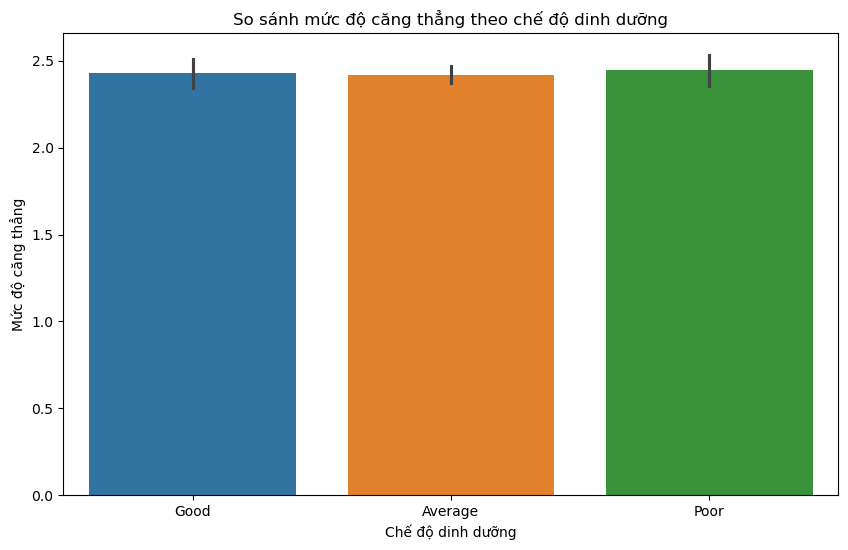

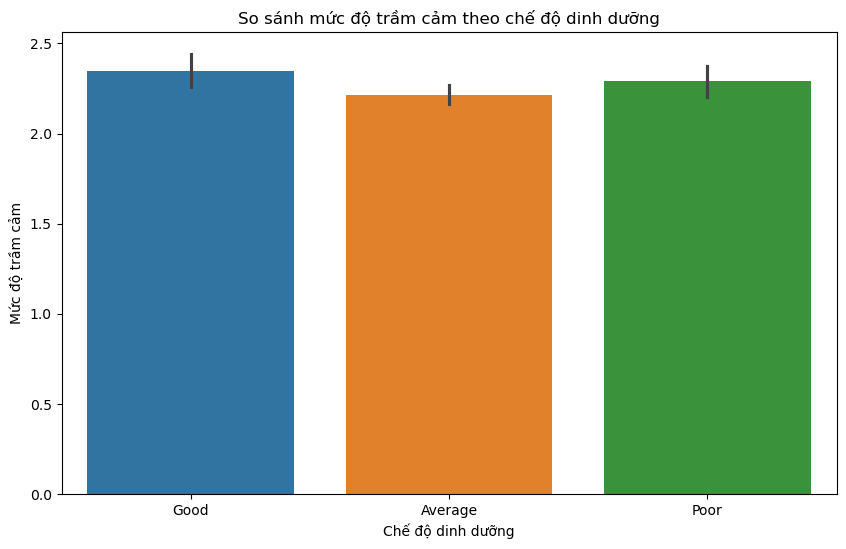

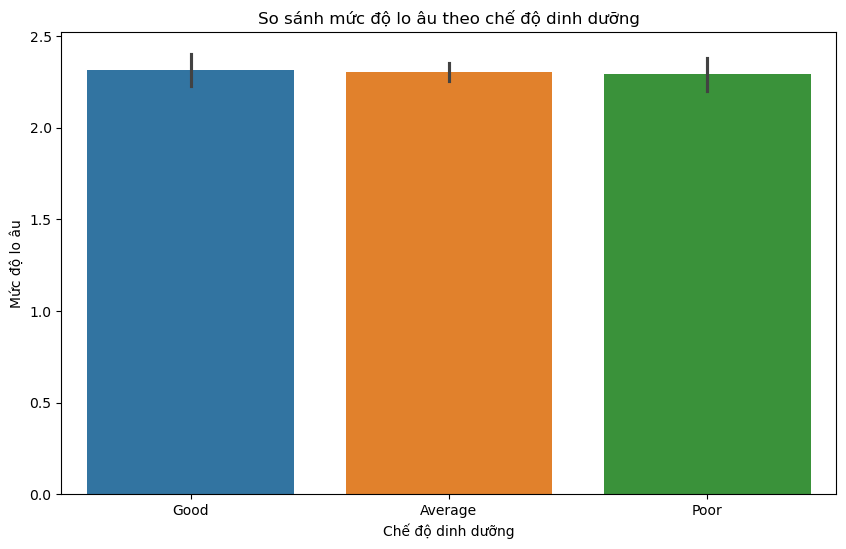

In [51]:
# biểu đồ cho mỗi yếu tố (chế độ dinh dưỡng)

plt.figure(figsize=(10, 6))
sns.barplot(x='Diet_Quality', y='Stress_Level', data=df2, hue='Diet_Quality')
plt.title('So sánh mức độ căng thẳng theo chế độ dinh dưỡng')
plt.xlabel('Chế độ dinh dưỡng')
plt.ylabel('Mức độ căng thẳng')
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x='Diet_Quality', y='Depression_Score', data=df2, hue='Diet_Quality')
plt.title('So sánh mức độ trầm cảm theo chế độ dinh dưỡng')
plt.xlabel('Chế độ dinh dưỡng')
plt.ylabel('Mức độ trầm cảm')
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x='Diet_Quality', y='Anxiety_Score', data=df2, hue='Diet_Quality')
plt.title('So sánh mức độ lo âu theo chế độ dinh dưỡng')
plt.xlabel('Chế độ dinh dưỡng')
plt.ylabel('Mức độ lo âu')
plt.show()

In [59]:
# Nhóm chế độ dinh dưỡng và điểm sức khỏe tâm thần trung bình
Diet_Quality_analysis = df2.groupby('Diet_Quality')[mental_health_factors].mean()
print("\nĐiểm sức khỏe tâm thần trung bình theo chế độ dinh dưỡng:")
print(Diet_Quality_analysis)


Điểm sức khỏe tâm thần trung bình theo chế độ dinh dưỡng:
              Stress_Level  Depression_Score  Anxiety_Score
Diet_Quality                                               
Average           2.418654          2.214640       2.303188
Good              2.429501          2.348518       2.315980
Poor              2.446154          2.291575       2.291575


In [ ]:
## III. Nhóm sức khỏe tâm lý

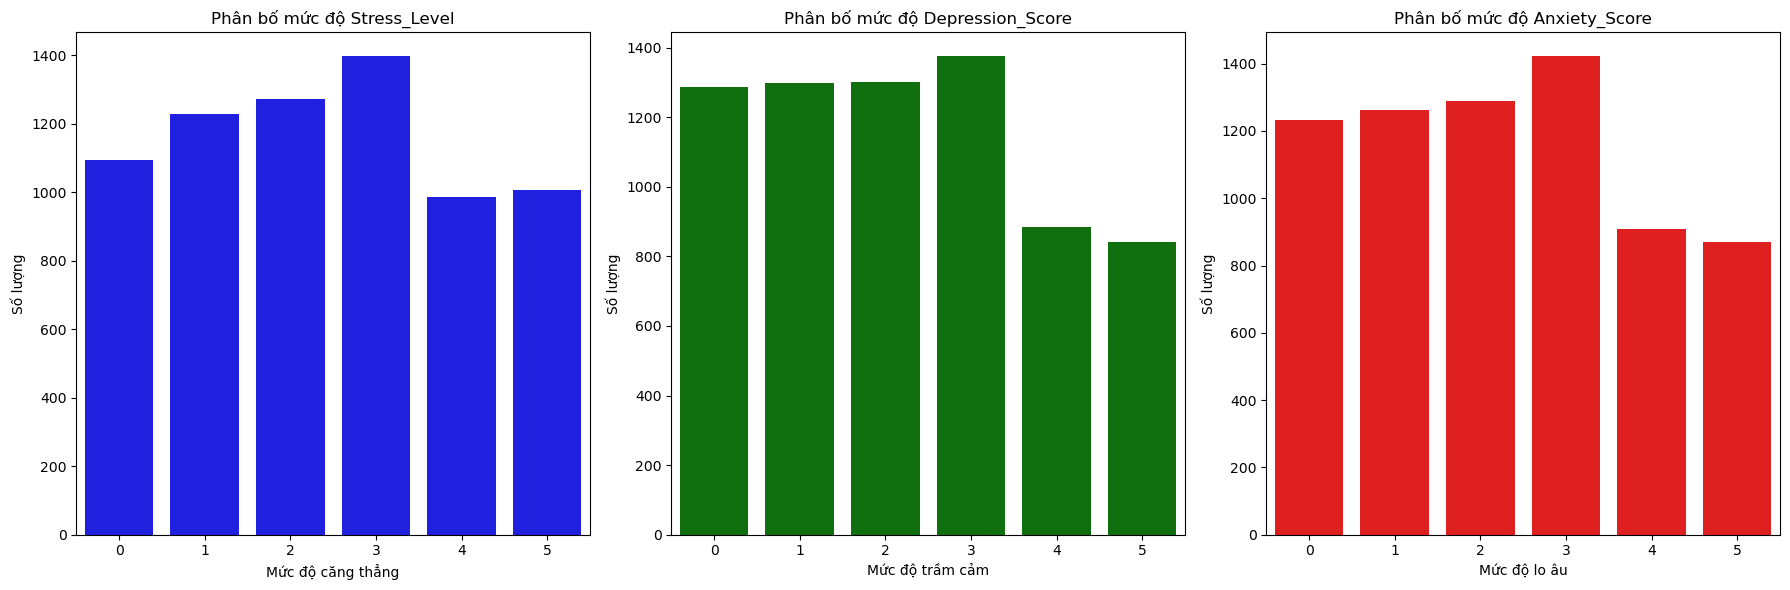

In [23]:
# 1. Bảng phân bổ mức độ căng thẳng, trầm cảm, lo âu 
# Tạo lưới 1 hàng, 3 cột để hiển thị các biểu đồ
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Biểu đồ phân bố mức độ Stress_Level
sns.countplot(ax=axes[0], x='Stress_Level', data=df2, color='blue')
axes[0].set_title('Phân bố mức độ Stress_Level')
axes[0].set_xlabel('Mức độ căng thẳng')
axes[0].set_ylabel('Số lượng')

# Biểu đồ phân bố mức độ Depression_Score
sns.countplot(ax=axes[1], x='Depression_Score', data=df2, color='green')
axes[1].set_title('Phân bố mức độ Depression_Score')
axes[1].set_xlabel('Mức độ trầm cảm')
axes[1].set_ylabel('Số lượng')

# Biểu đồ phân bố mức độ Anxiety_Score
sns.countplot(ax=axes[2], x='Anxiety_Score', data=df2, color='red')
axes[2].set_title('Phân bố mức độ Anxiety_Score')
axes[2].set_xlabel('Mức độ lo âu')
axes[2].set_ylabel('Số lượng')

# Điều chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()
plt.show()


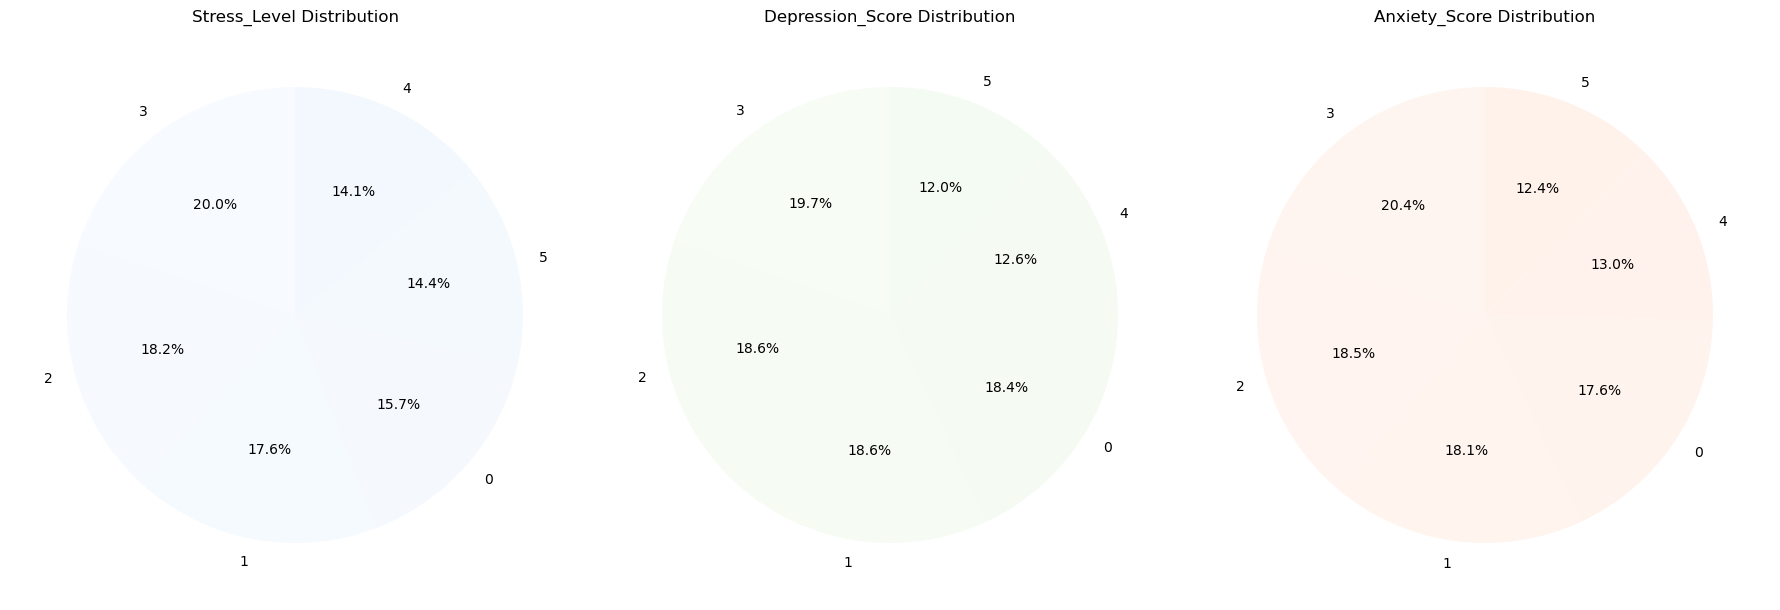

In [25]:
# 2. nhóm sức khỏe tâm lý
import matplotlib.pyplot as plt

# Đếm số lượng từng mức độ trong Stress_Level, Depression_Score, và Anxiety_Score
stress_counts = df2['Stress_Level'].value_counts()
depression_counts = df2['Depression_Score'].value_counts()
anxiety_counts = df2['Anxiety_Score'].value_counts()

# Thiết lập biểu đồ
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Biểu đồ pie cho Stress_Level
axes[0].pie(
    stress_counts, labels=stress_counts.index, autopct='%1.1f%%', 
    startangle=90, colors=plt.cm.Blues(range(len(stress_counts)))
)
axes[0].set_title('Stress_Level Distribution')

# Biểu đồ pie cho Depression_Score
axes[1].pie(
    depression_counts, labels=depression_counts.index, autopct='%1.1f%%', 
    startangle=90, colors=plt.cm.Greens(range(len(depression_counts)))
)
axes[1].set_title('Depression_Score Distribution')

# Biểu đồ pie cho Anxiety_Score
axes[2].pie(
    anxiety_counts, labels=anxiety_counts.index, autopct='%1.1f%%', 
    startangle=90, colors=plt.cm.Reds(range(len(anxiety_counts)))
)
axes[2].set_title('Anxiety_Score Distribution')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


In [ ]:
## IV. Nhóm các mối quan hệ bên ngoài

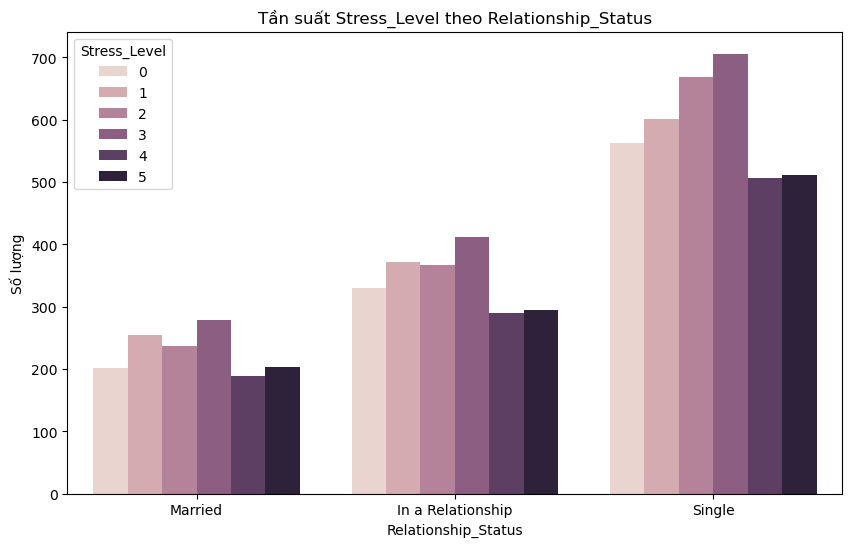

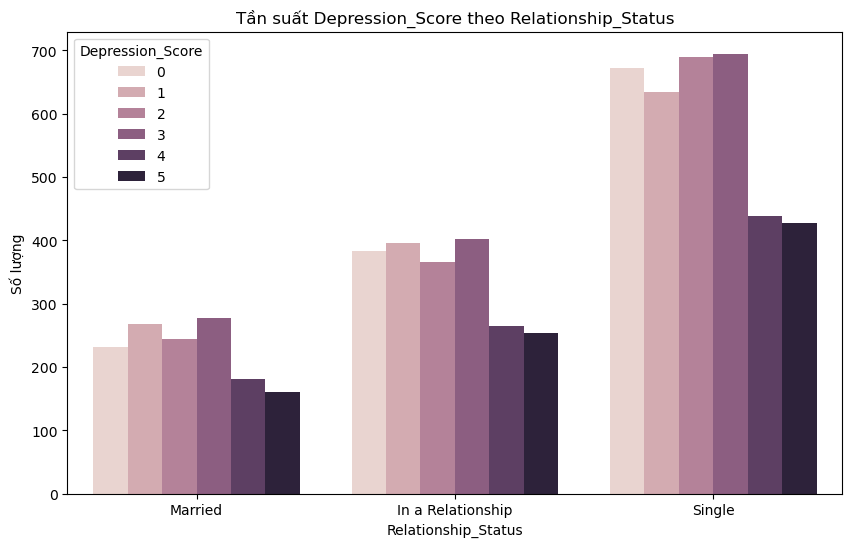

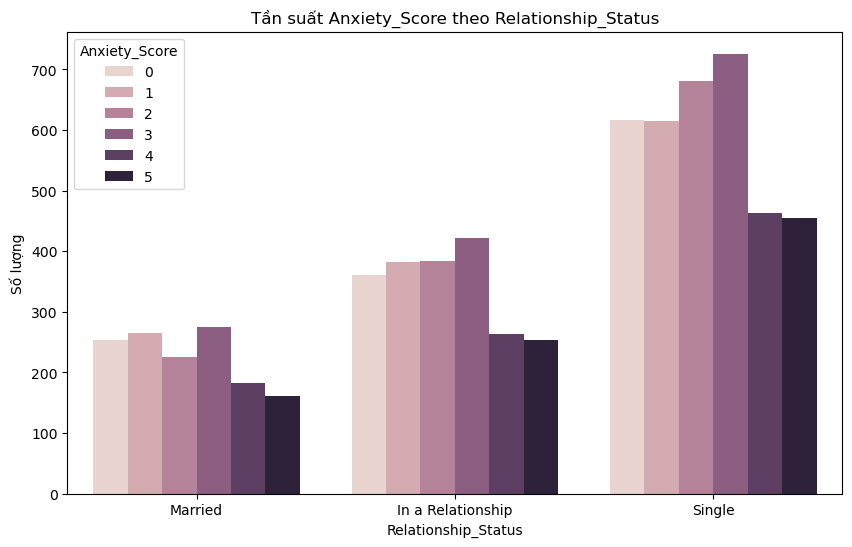

In [67]:
factors = ['Relationship_Status']
# 1. Mối quan hệ với các chỉ số tâm lý 
for factor in factors:
    plt.figure(figsize=(10, 6))

    # Vẽ biểu đồ countplot với hue là 'Stress_Level'
    sns.countplot(x=factor, hue='Stress_Level', data=df2)
    plt.title(f'Tần suất Stress_Level theo {factor}')
    plt.xlabel(factor)
    plt.ylabel('Số lượng')
    plt.legend(title='Stress_Level')
    plt.show()

for factor in factors:
    plt.figure(figsize=(10, 6))    
    
    # Vẽ biểu đồ countplot với hue là 'Depression_Score'
    sns.countplot(x=factor, hue='Depression_Score', data=df2)
    plt.title(f'Tần suất Depression_Score theo {factor}')
    plt.xlabel(factor)
    plt.ylabel('Số lượng')
    plt.legend(title='Depression_Score')
    plt.show()
    
for factor in factors:
    plt.figure(figsize=(10, 6))
    
    # Vẽ biểu đồ countplot với hue là 'Anxiety_Score'
    sns.countplot(x=factor, hue='Anxiety_Score', data=df2)
    plt.title(f'Tần suất Anxiety_Score theo {factor}')
    plt.xlabel(factor)
    plt.ylabel('Số lượng')
    plt.legend(title='Anxiety_Score')
    plt.show()


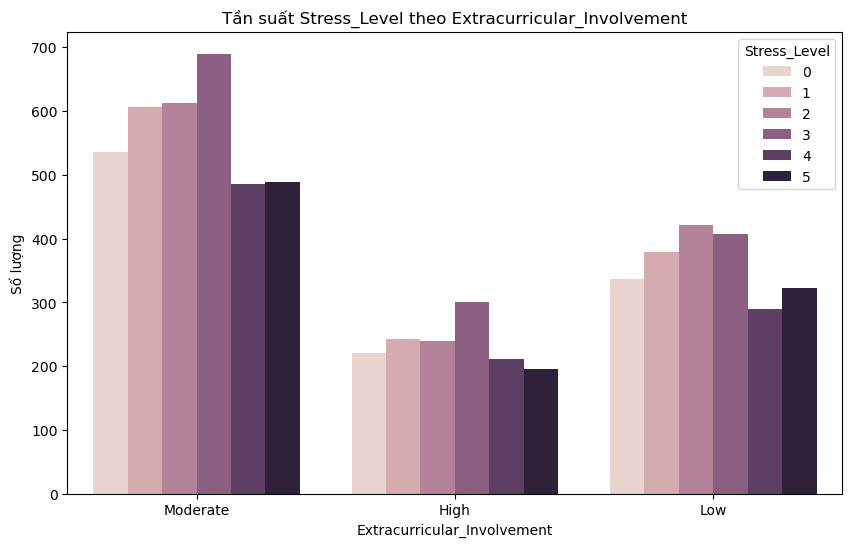

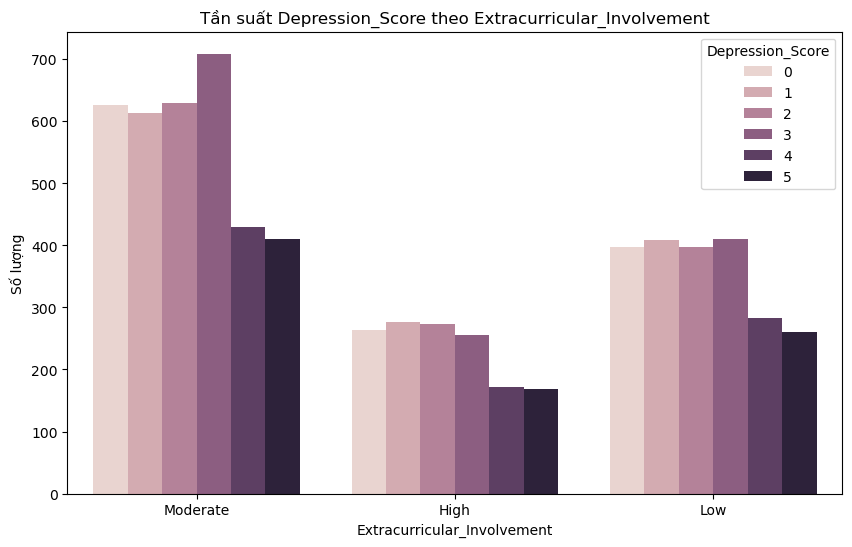

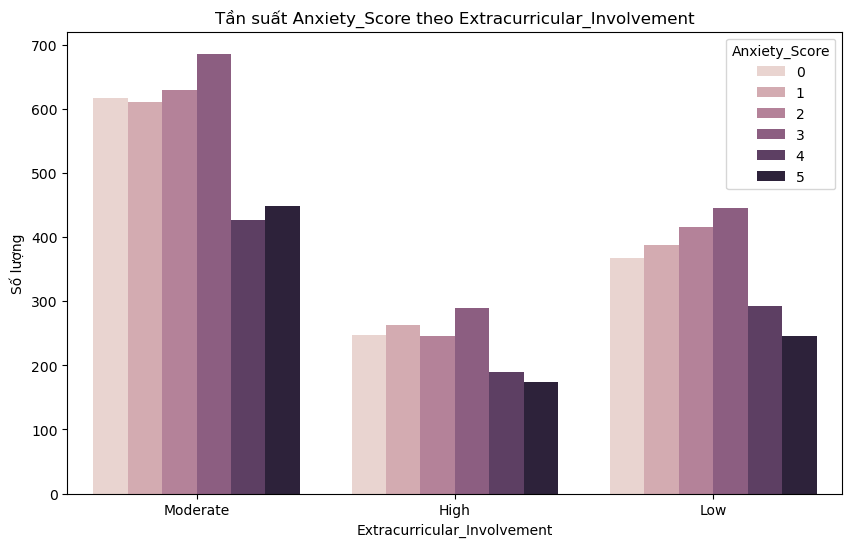

In [69]:
factors = ['Extracurricular_Involvement']
# 2. Tham gia ngoại khóa với chỉ số tâm lý 
# Duyệt qua từng yếu tố trong danh sách
for factor in factors:
    plt.figure(figsize=(10, 6))
    
    # Vẽ biểu đồ countplot với hue là 'Stress_Level'
    sns.countplot(x=factor, hue='Stress_Level', data=df2)
    plt.title(f'Tần suất Stress_Level theo {factor}')
    plt.xlabel(factor)
    plt.ylabel('Số lượng')
    plt.legend(title='Stress_Level')
    plt.show()
    
for factor in factors:
    plt.figure(figsize=(10, 6))    
    
    # Vẽ biểu đồ countplot với hue là 'Depression_Score'
    sns.countplot(x=factor, hue='Depression_Score', data=df2)
    plt.title(f'Tần suất Depression_Score theo {factor}')
    plt.xlabel(factor)
    plt.ylabel('Số lượng')
    plt.legend(title='Depression_Score')
    plt.show()
    
for factor in factors:
    plt.figure(figsize=(10, 6))
    
    # Vẽ biểu đồ countplot với hue là 'Anxiety_Score'
    sns.countplot(x=factor, hue='Anxiety_Score', data=df2)
    plt.title(f'Tần suất Anxiety_Score theo {factor}')
    plt.xlabel(factor)
    plt.ylabel('Số lượng')
    plt.legend(title='Anxiety_Score')
    plt.show()


In [ ]:
## V. Nhóm tình trạng sức khỏe cơ thể

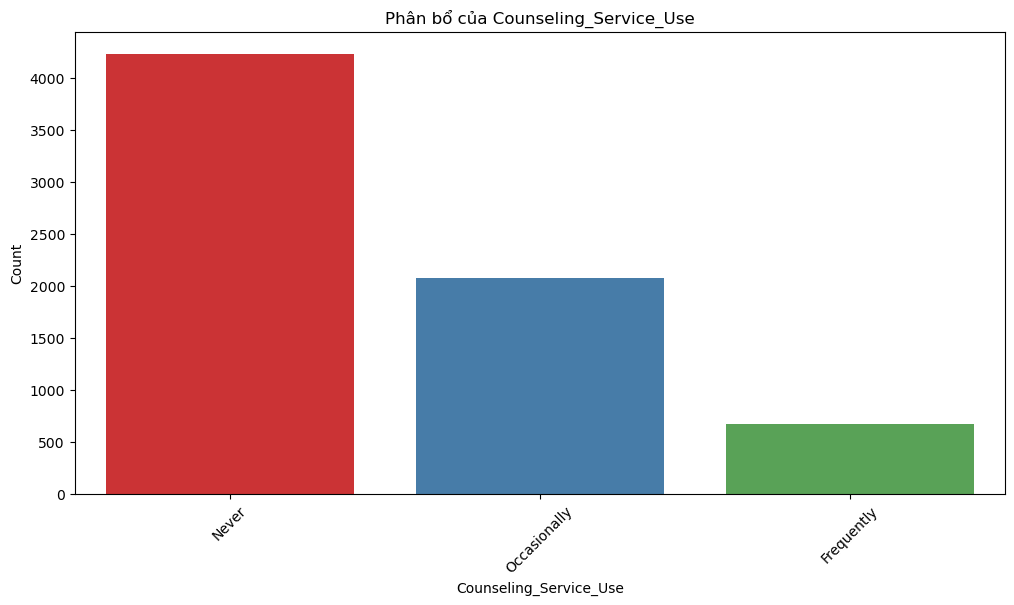

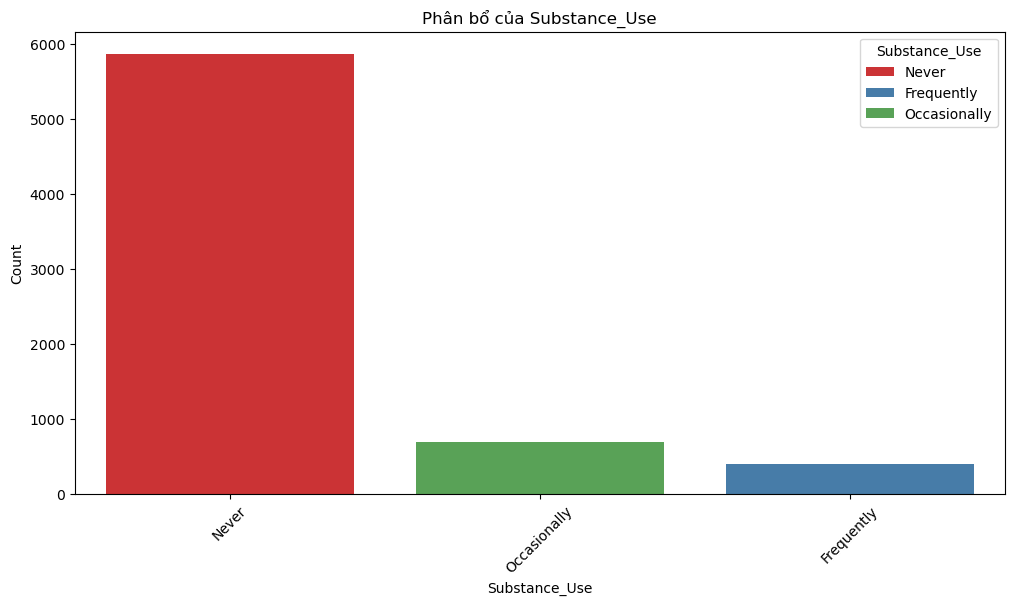

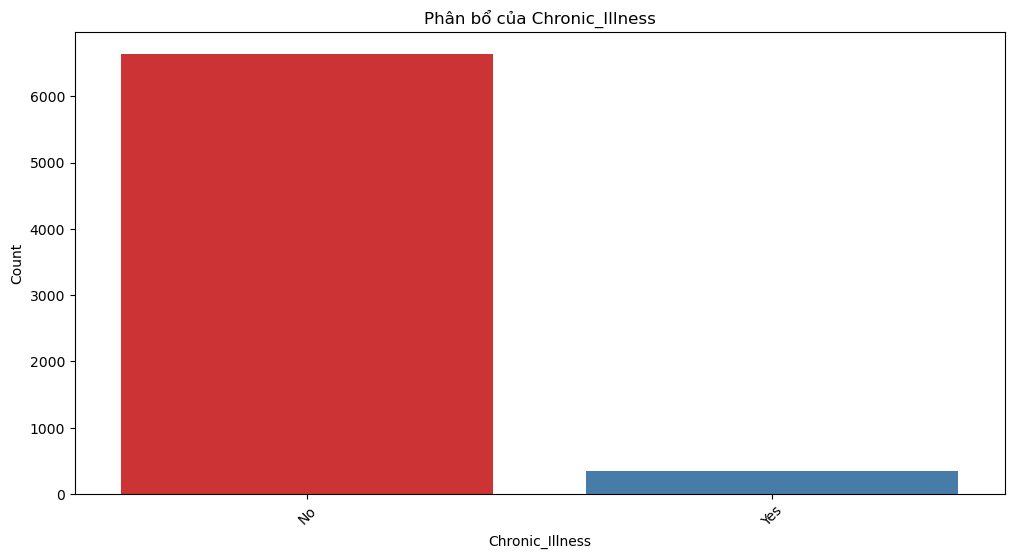

In [76]:
# 1. Phân bố tư vấn, sử dụng chất gây nghiện và bệnh mãn tính 
counseling_substance_factors = ['Counseling_Service_Use', 'Substance_Use', 'Chronic_Illness']
for factor in counseling_substance_factors:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=factor, hue=factor, data=df2, palette='Set1', dodge=False, order=df2[factor].value_counts().index)
    plt.title(f'Phân bố của {factor}')
    plt.xlabel(factor)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

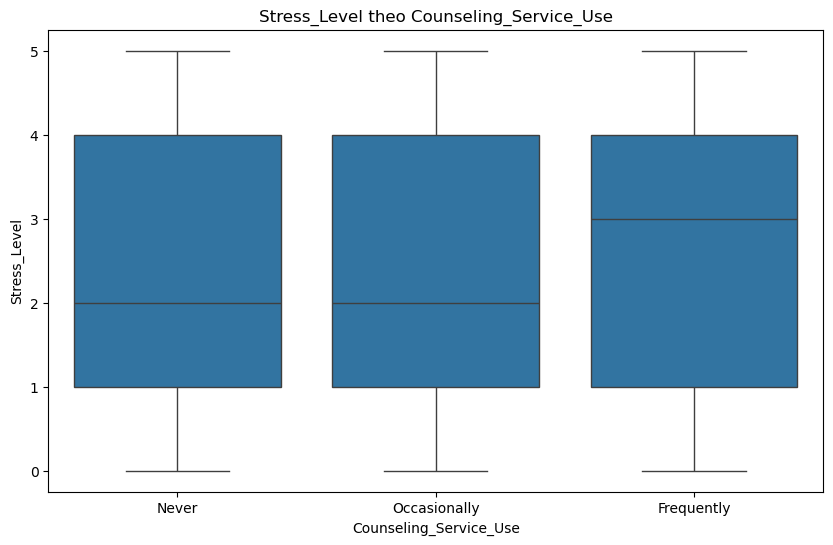

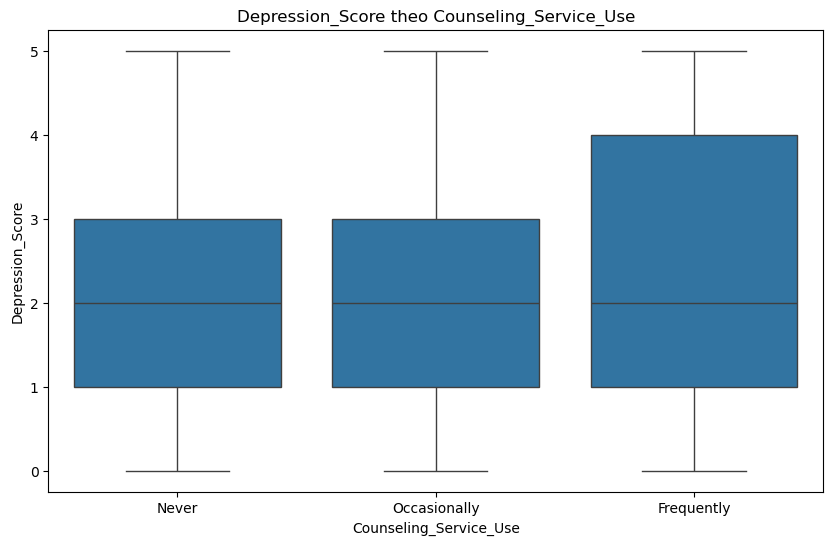

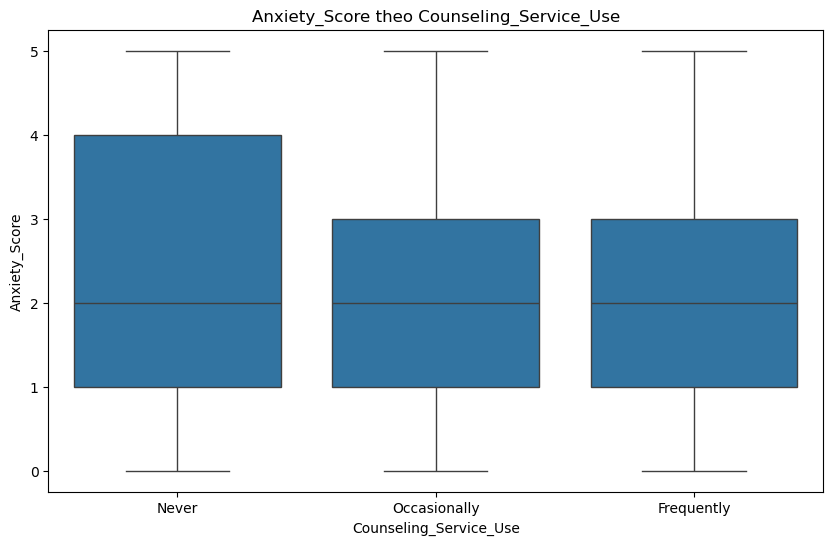

In [53]:
# sử dụng dịch vụ tư vấn 
factors = [ 'Counseling_Service_Use']
mental_health_factors = ['Stress_Level', 'Depression_Score', 'Anxiety_Score']

for factor in factors:
    for mental_health in mental_health_factors:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=factor, y=mental_health, data=df2)
        plt.title(f'{mental_health} theo {factor}')
        plt.xlabel(factor)
        plt.ylabel(mental_health)
        plt.show()

In [80]:
# Nhóm theo Sử dụng Dịch vụ Tư vấn và Điểm Sức khỏe Tâm thần Trung bình
counseling_analysis = df2.groupby('Counseling_Service_Use')[mental_health_factors].mean()
print("\nĐiểm sức khỏe tâm thần trung bình theo việc sử dụng dịch vụ tư vấn:")
print(counseling_analysis)


Điểm sức khỏe tâm thần trung bình theo việc sử dụng dịch vụ tư vấn:
                        Stress_Level  Depression_Score  Anxiety_Score
Counseling_Service_Use                                               
Frequently                  2.526786          2.328869       2.258929
Never                       2.404532          2.253717       2.305169
Occasionally                2.437801          2.237705       2.314368


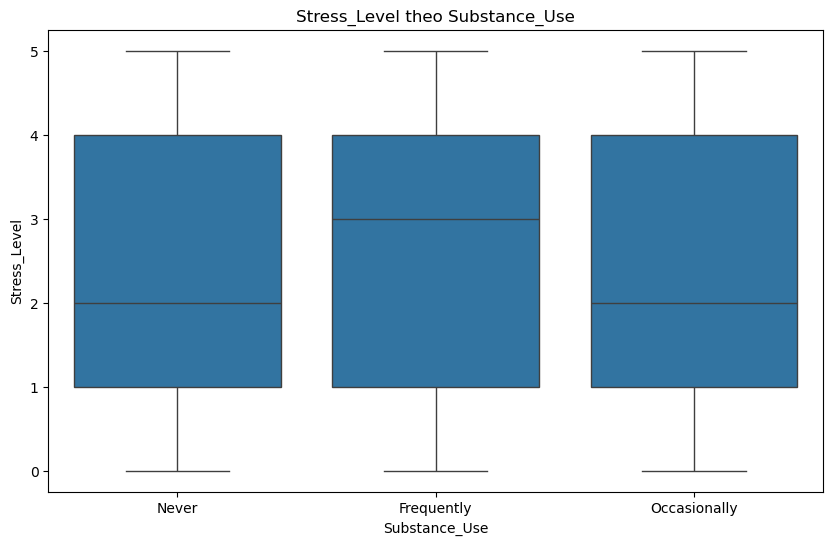

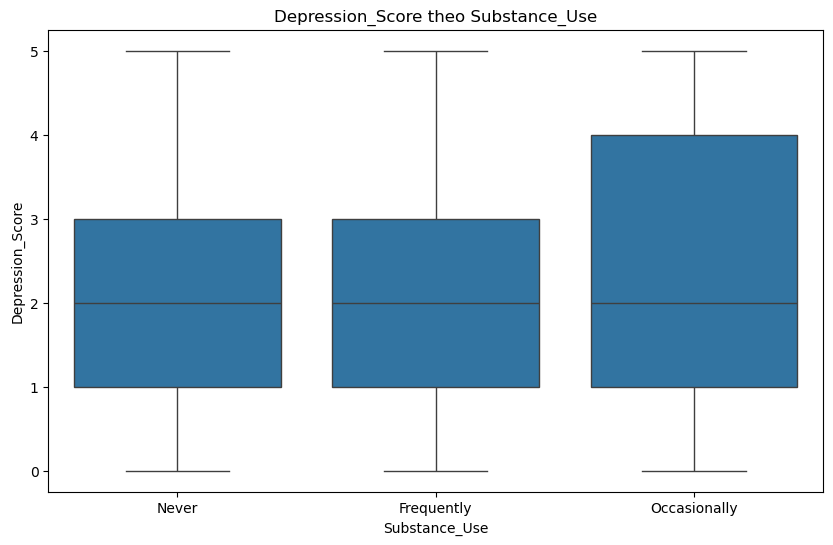

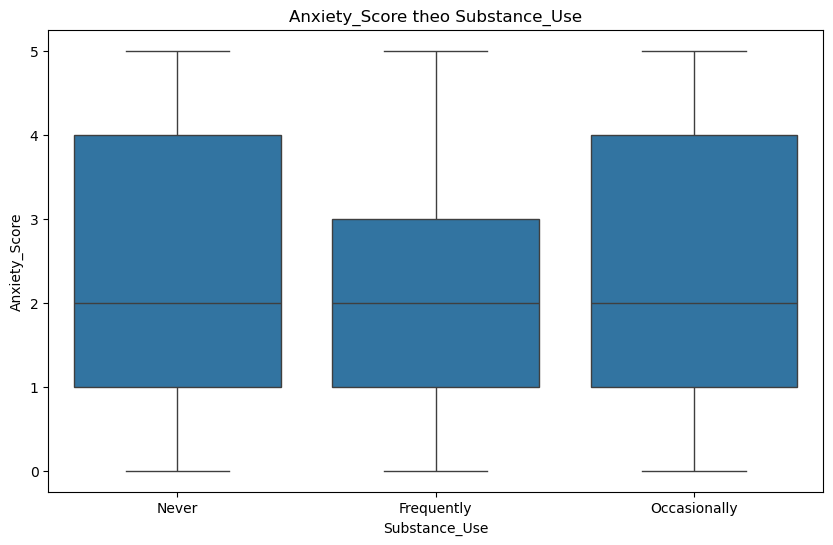

In [51]:
# sử dụng chất kích thích 
factors = ['Substance_Use']
mental_health_factors = ['Stress_Level', 'Depression_Score', 'Anxiety_Score']

for factor in factors:
    for mental_health in mental_health_factors:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=factor, y=mental_health, data=df2)
        plt.title(f'{mental_health} theo {factor}')
        plt.xlabel(factor)
        plt.ylabel(mental_health)
        plt.show()

In [82]:
# Nhóm theo sử dụng chất kích thích và Điểm sức khỏe tâm thần trung bình
substance_analysis = df2.groupby('Substance_Use')[mental_health_factors].mean()
print("\nĐiểm sức khỏe tâm thần trung bình theo việc sử dụng chất gây nghiện:")
print(substance_analysis)


Điểm sức khỏe tâm thần trung bình theo việc sử dụng chất gây nghiện:
               Stress_Level  Depression_Score  Anxiety_Score
Substance_Use                                               
Frequently         2.441687          2.215881       2.305211
Never              2.425115          2.248424       2.305333
Occasionally       2.425287          2.352011       2.294540


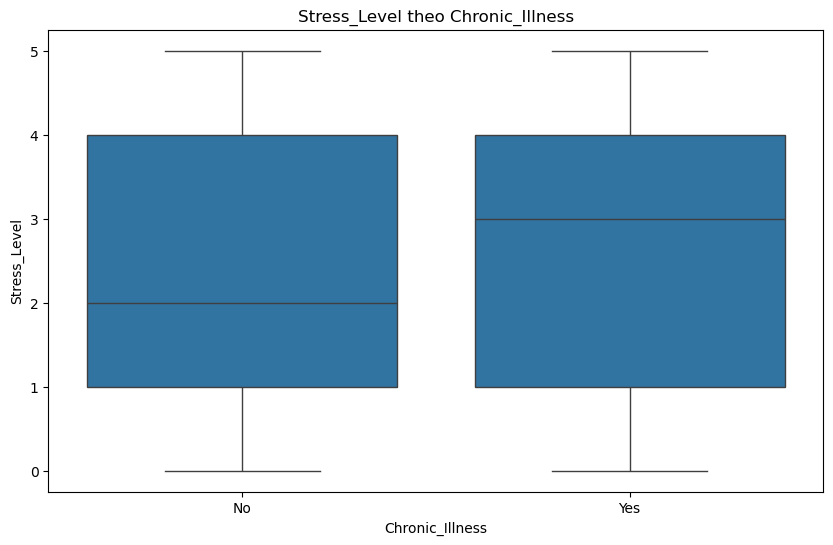

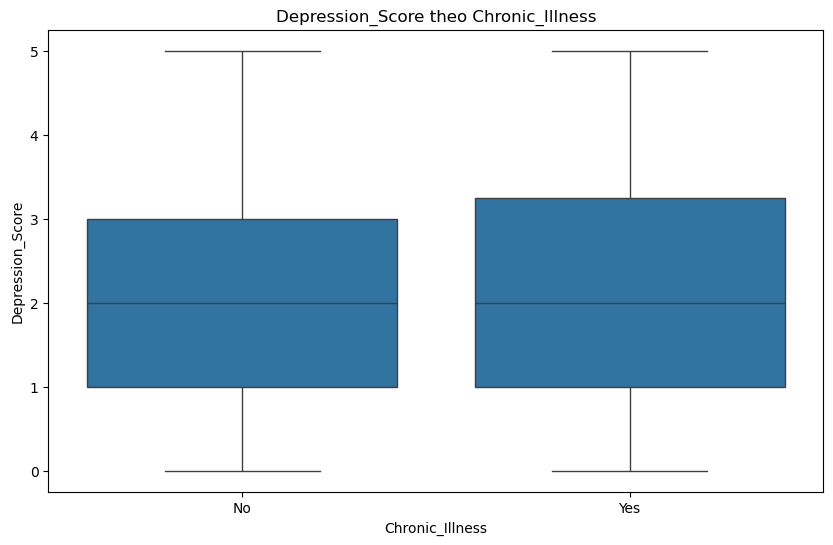

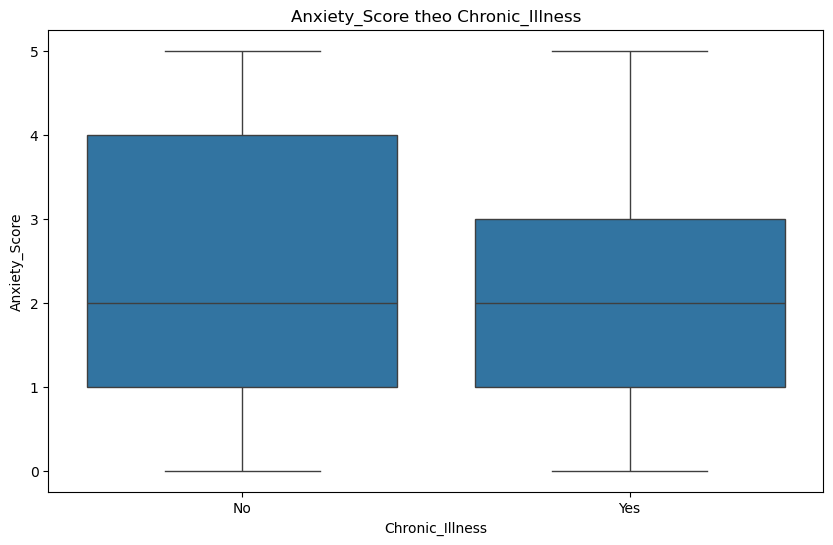

In [55]:
# Bệnh mãn tính 
factors = [ 'Chronic_Illness']
mental_health_factors = ['Stress_Level', 'Depression_Score', 'Anxiety_Score']

for factor in factors:
    for mental_health in mental_health_factors:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=factor, y=mental_health, data=df2)
        plt.title(f'{mental_health} theo {factor}')
        plt.xlabel(factor)
        plt.ylabel(mental_health)
        plt.show()

In [84]:
# Nhóm theo bệnh mãn tính và Điểm sức khỏe tâm thần trung bình
Chronic_Illness_analysis = df2.groupby('Chronic_Illness')[mental_health_factors].mean()
print("\nĐiểm sức khỏe tâm thần trung bình theo bệnh mãn tính")
print(Chronic_Illness_analysis)


Điểm sức khỏe tâm thần trung bình theo bệnh mãn tính
                 Stress_Level  Depression_Score  Anxiety_Score
Chronic_Illness                                               
No                   2.419642          2.256364       2.307275
Yes                  2.552326          2.252907       2.229651


In [ ]:
## VI. Nhóm theo Hỗ trợ xã hội và Căng thẳng tài chính

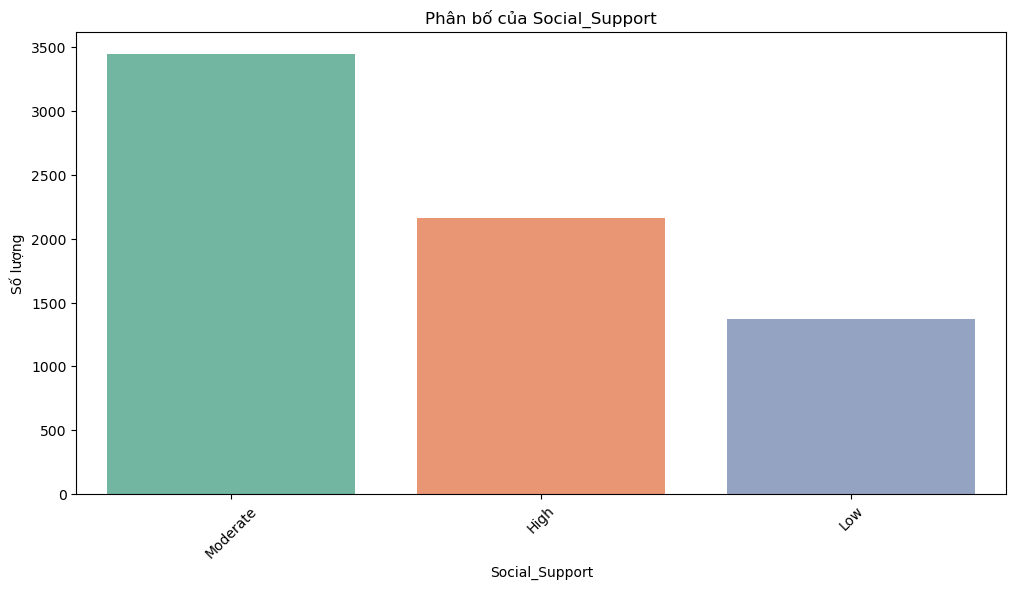

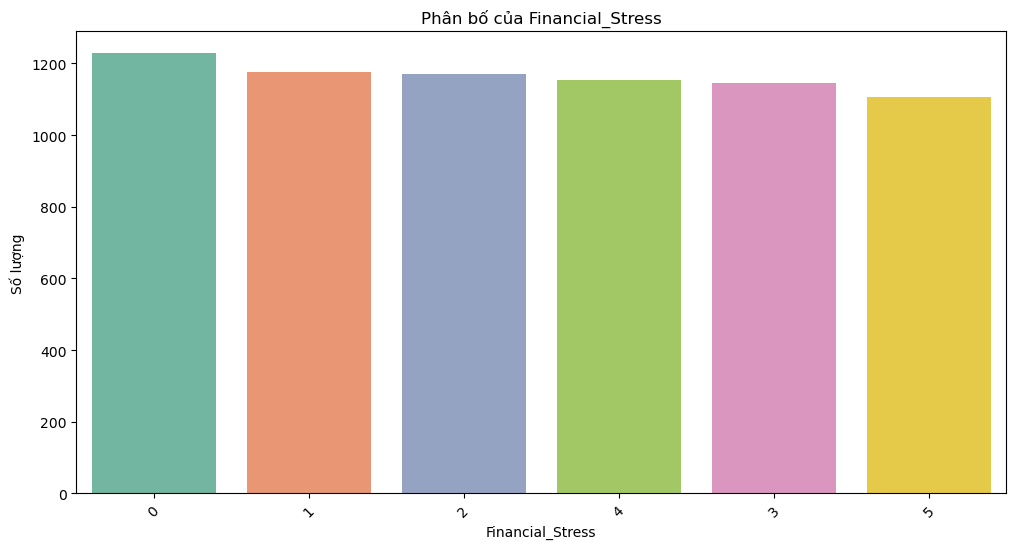

In [73]:
# 1. Phân phối hỗ trợ xã hội căng thẳng tài chính
# Danh sách các yếu tố cần thể hiện
factors = ['Social_Support', 'Financial_Stress']

# Lặp qua từng yếu tố trong danh sách
for factor in factors:  
    # Tạo khung vẽ biểu đồ
    plt.figure(figsize=(12, 6))  
    
    # Vẽ biểu đồ cột đếm số lượng
    sns.countplot(data=df2, x=factor, hue=factor, palette='Set2', 
                  order=df2[factor].value_counts().index, legend=False)  
    
    # Thêm tiêu đề và nhãn
    plt.title(f'Phân bố của {factor}')  
    plt.xlabel(factor)  
    plt.ylabel('Số lượng')  
    plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn
    
    # Hiển thị biểu đồ
    plt.show()

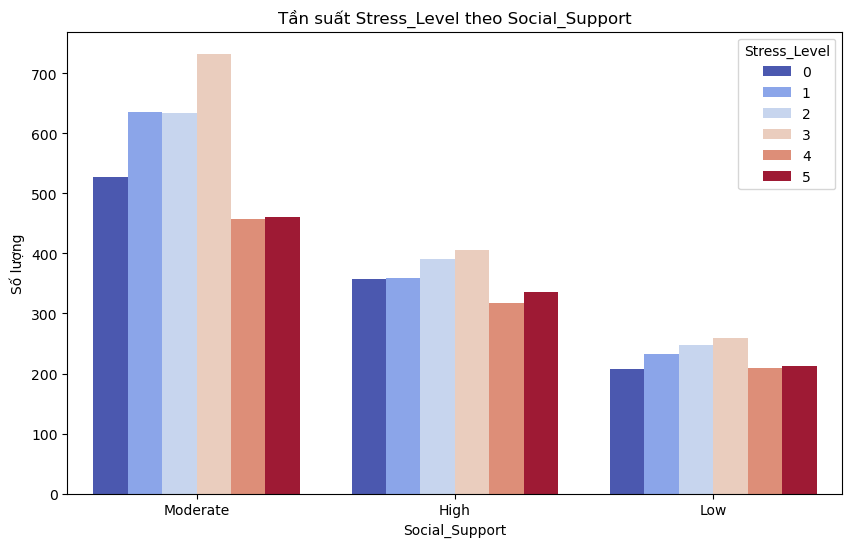

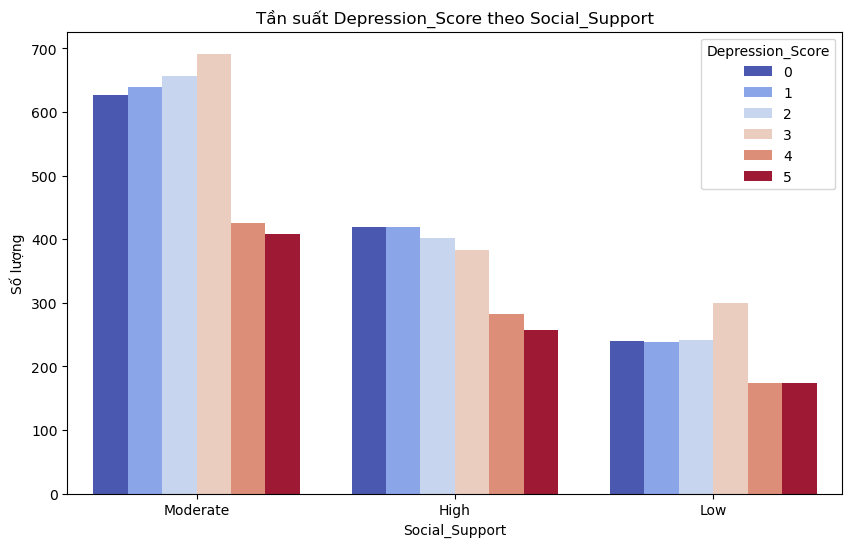

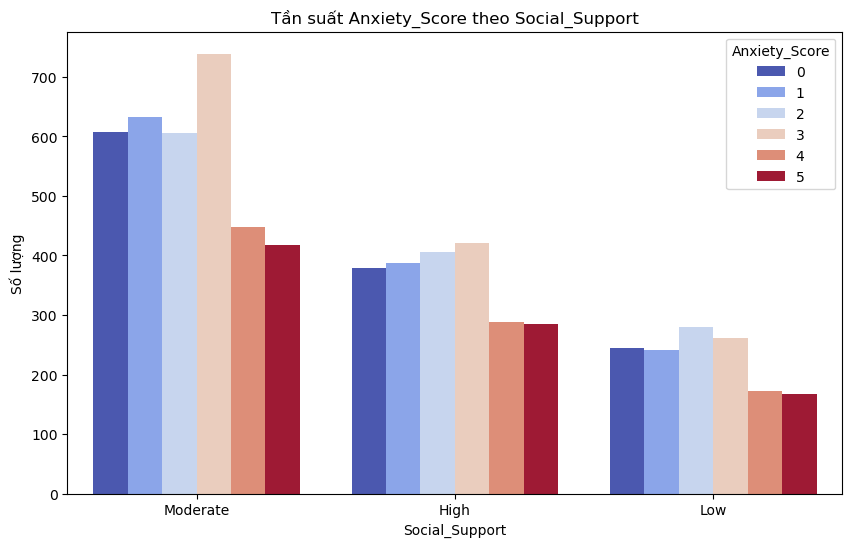

In [101]:
factors = ['Social_Support']

# Vẽ biểu đồ countplot với hue là 'Stress_Level'
for factor in factors:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=factor, hue='Stress_Level', data=df2, palette='coolwarm')  # Đổi màu sắc thành 'coolwarm'
    plt.title(f'Tần suất Stress_Level theo {factor}')
    plt.xlabel(factor)
    plt.ylabel('Số lượng')
    plt.legend(title='Stress_Level')
    plt.show()

# Vẽ biểu đồ countplot với hue là 'Depression_Score'
for factor in factors:
    plt.figure(figsize=(10, 6))    
    sns.countplot(x=factor, hue='Depression_Score', data=df2, palette='coolwarm')  # Đổi màu sắc thành 'viridis'
    plt.title(f'Tần suất Depression_Score theo {factor}')
    plt.xlabel(factor)
    plt.ylabel('Số lượng')
    plt.legend(title='Depression_Score')
    plt.show()

# Vẽ biểu đồ countplot với hue là 'Anxiety_Score'
for factor in factors:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=factor, hue='Anxiety_Score', data=df2, palette='coolwarm')  # Đổi màu sắc thành 'cubehelix'
    plt.title(f'Tần suất Anxiety_Score theo {factor}')
    plt.xlabel(factor)
    plt.ylabel('Số lượng')
    plt.legend(title='Anxiety_Score')
    plt.show()

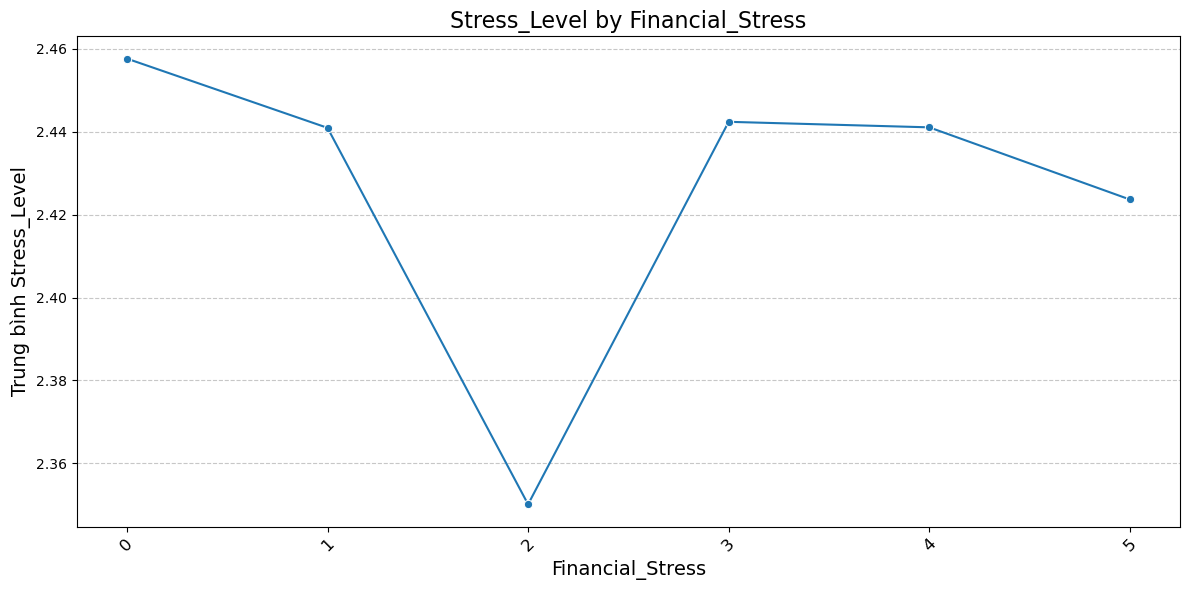

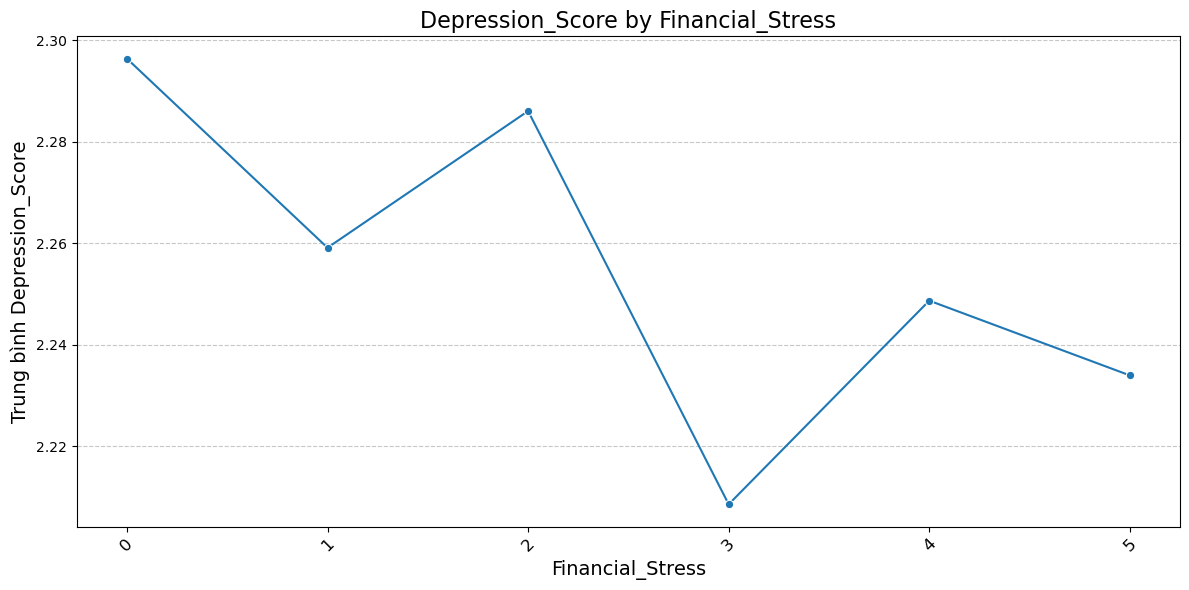

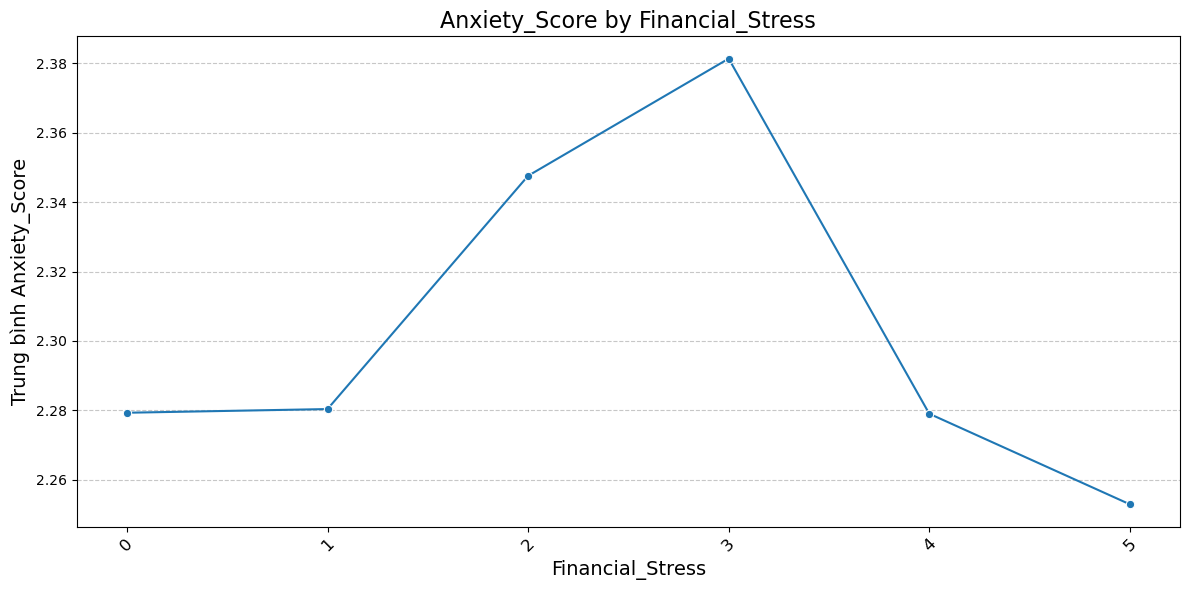

In [91]:
for factor in mental_health_factors:
    plt.figure(figsize=(12, 6))
    grouped_data = df2.groupby(additional_factor)[factor].mean().reset_index()
    sns.lineplot(
        x=additional_factor,
        y=factor,
        data=grouped_data,
        marker='o'
    )
    plt.title(f'{factor} by {additional_factor}', fontsize=16)
    plt.xlabel(additional_factor, fontsize=14)
    plt.ylabel(f'Trung bình {factor}', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [79]:
# Nhóm theo Hỗ trợ xã hội và Căng thẳng tài chính
for additional_factor in additional_factors:
    grouped_analysis = df2.groupby(additional_factor)[mental_health_factors].mean()
    print(f"\nĐiểm sức khỏe tâm thần trung bình của {additional_factor}:")
    print(grouped_analysis)


Điểm sức khỏe tâm thần trung bình của Social_Support:
                Stress_Level  Depression_Score  Anxiety_Score
Social_Support                                               
High                2.447575          2.212471       2.324711
Low                 2.487573          2.330409       2.277047
Moderate            2.388406          2.254203       2.300580

Điểm sức khỏe tâm thần trung bình của Financial_Stress:
                  Stress_Level  Depression_Score  Anxiety_Score
Financial_Stress                                               
0                     2.457655          2.296417       2.279316
1                     2.440952          2.259133       2.280374
2                     2.350128          2.286080       2.347566
3                     2.442408          2.208551       2.381326
4                     2.441075          2.248700       2.279029
5                     2.423668          2.233966       2.252936
